In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

/Users/aimachine/opt/anaconda3/envs/NapariTrack/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


Index from Java code: 256


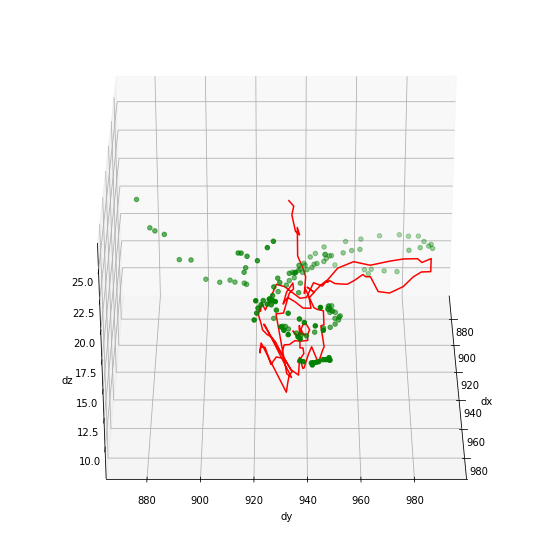

Index from Java code: 131


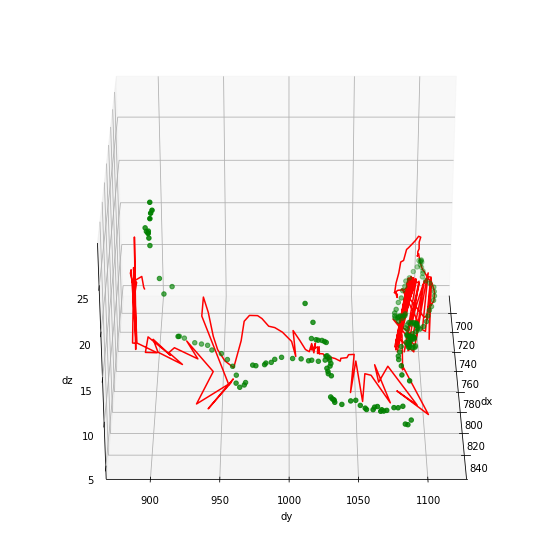

Index from Java code: 263


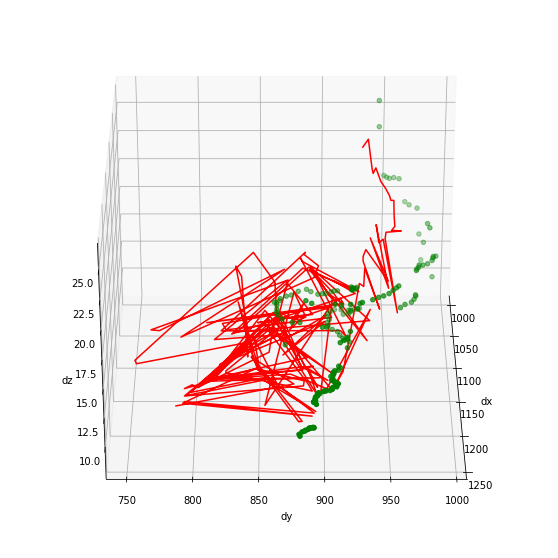

Index from Java code: 266


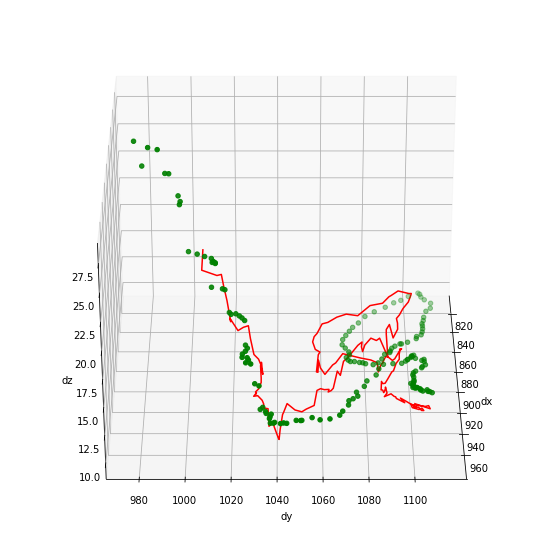

Index from Java code: 18


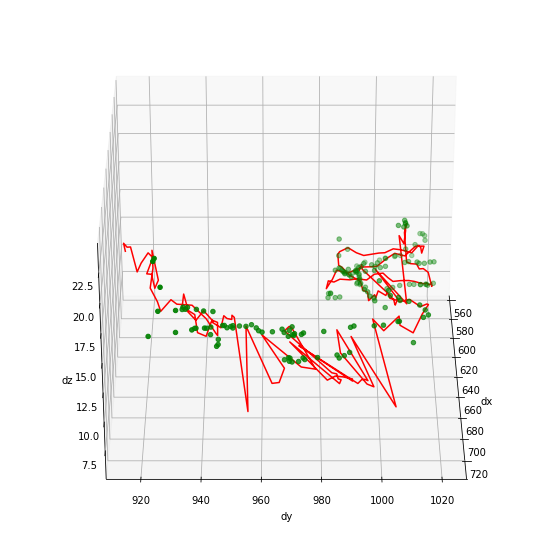

Index from Java code: 150


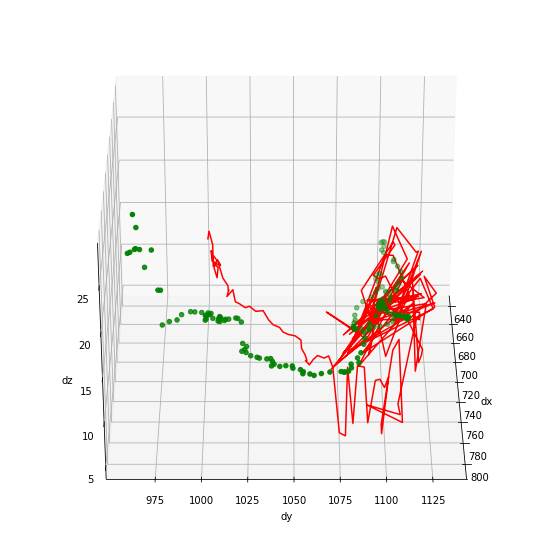

Index from Java code: 152


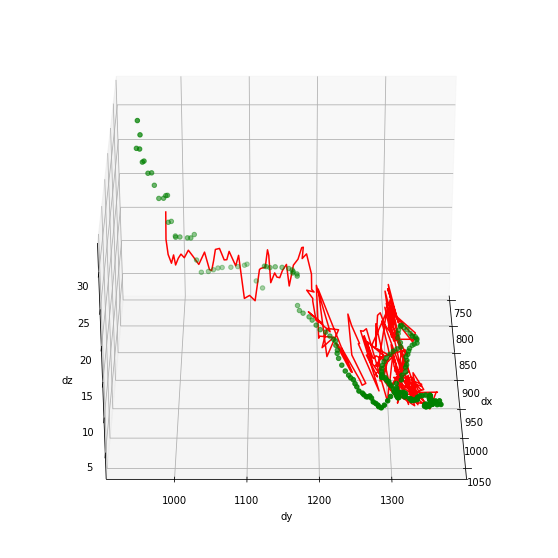

Index from Java code: 25


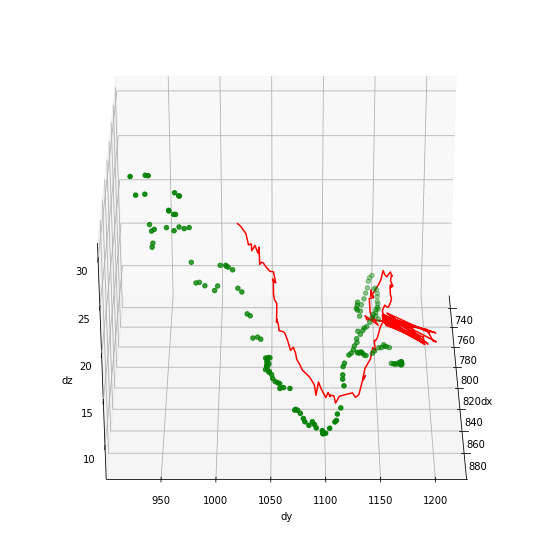

Index from Java code: 28


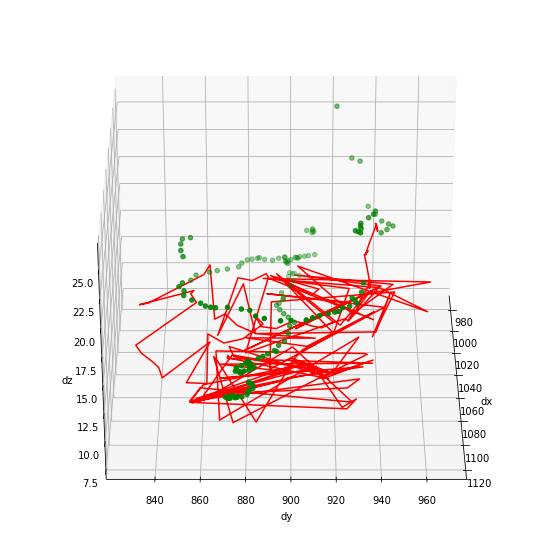

Index from Java code: 29


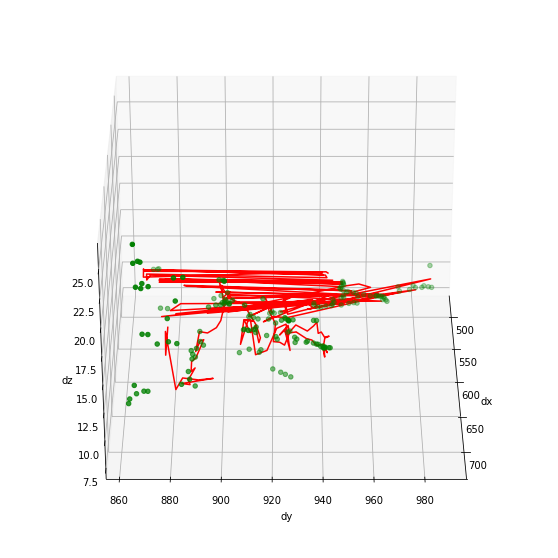

Index from Java code: 162


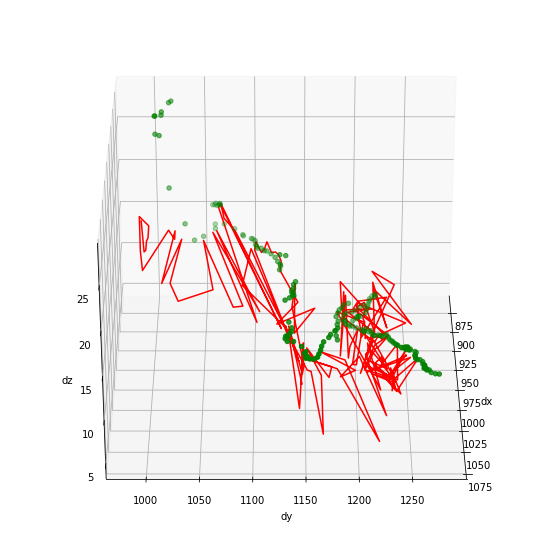

Index from Java code: 174


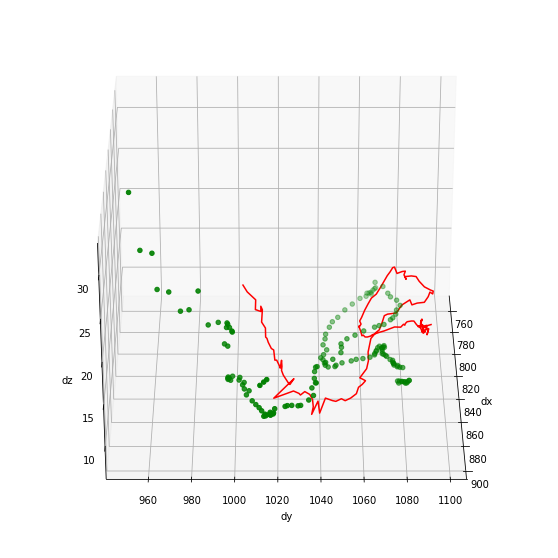

Index from Java code: 48


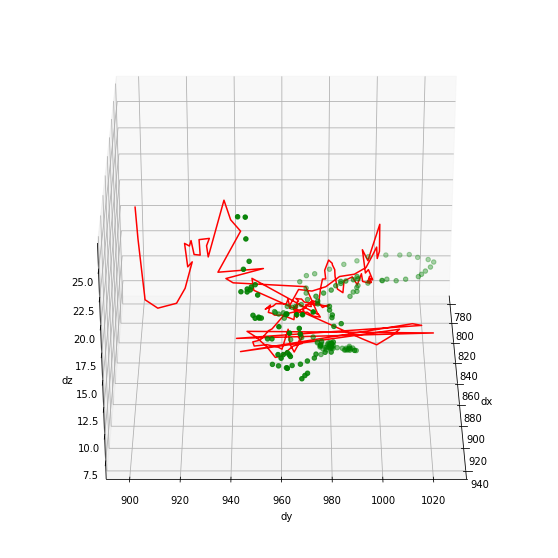

Index from Java code: 305


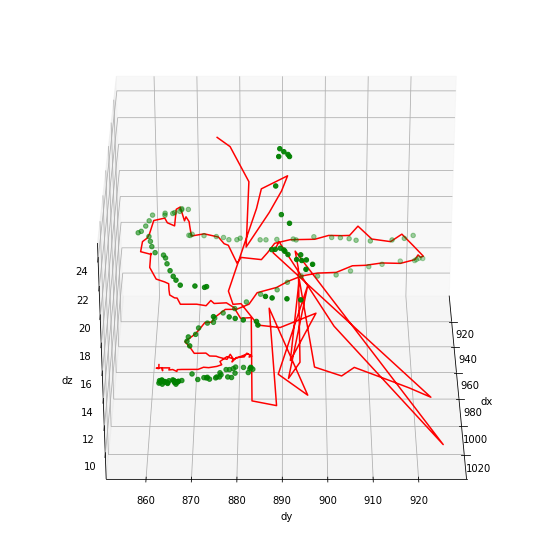

Index from Java code: 309


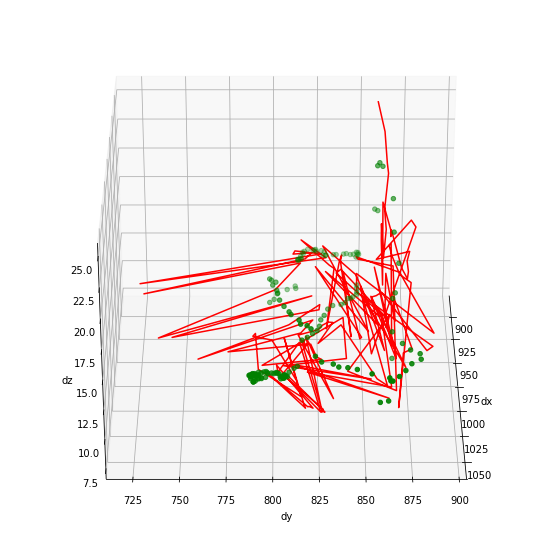

Index from Java code: 74


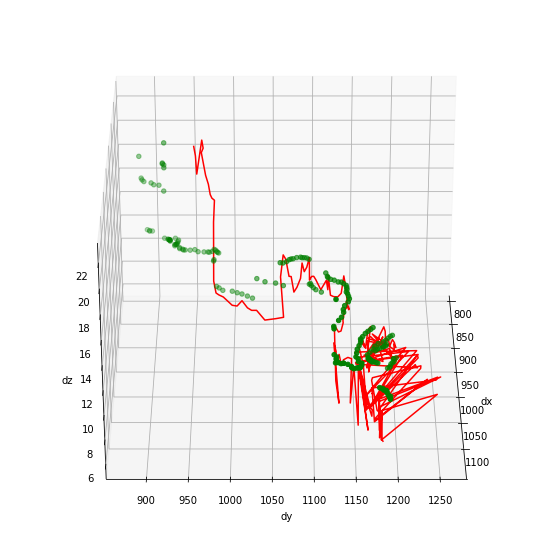

Index from Java code: 86


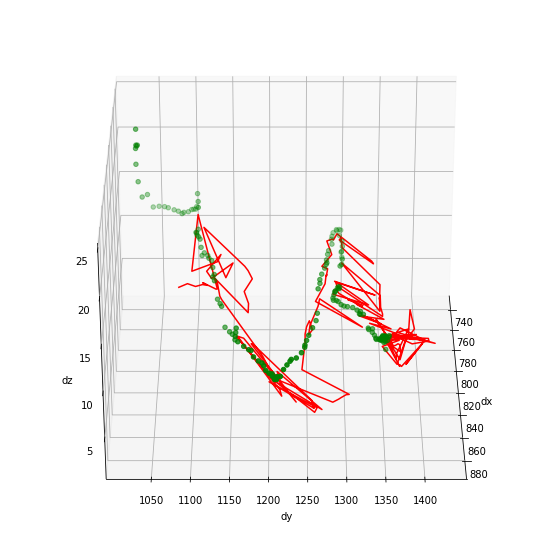

Index from Java code: 221


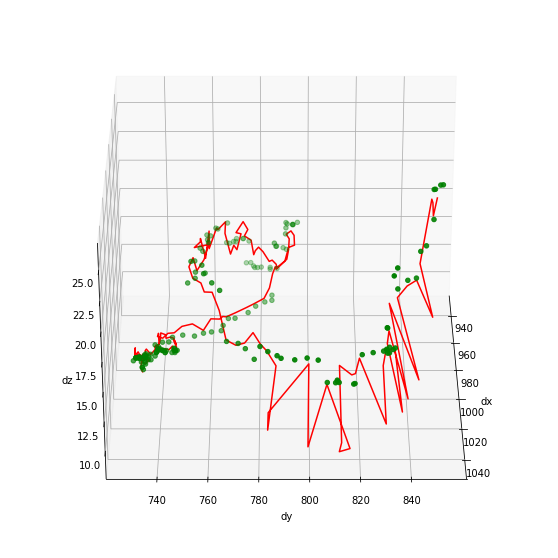

Index from Java code: 248


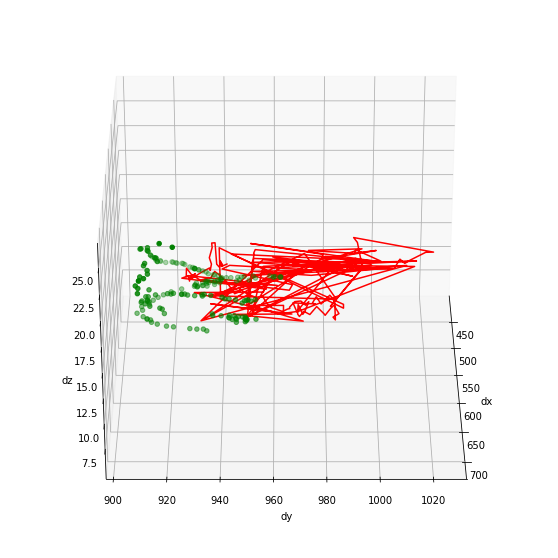

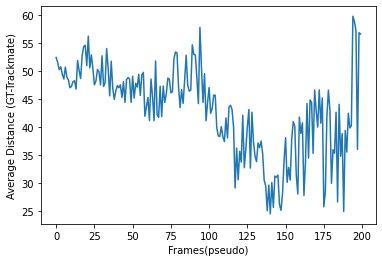

In [2]:
trackperformance = "/Users/aimachine/trackresults.txt"



dataset = pd.read_csv(trackperformance, delimiter =" " , index_col = False)

track_indices = dataset[dataset.keys()[0]][0:]

Xreference =  dataset[dataset.keys()[1]][0:]
Yreference =  dataset[dataset.keys()[2]][0:]
Zreference =  dataset[dataset.keys()[3]][0:]

Xcandidate =  dataset[dataset.keys()[4]][0:]
Ycandidate =  dataset[dataset.keys()[5]][0:]
Zcandidate =  dataset[dataset.keys()[7]][0:]

dataset_index = dataset.index
unique_indices = set(track_indices)
Globalav = []
for uniqueindex in unique_indices:
   figure = plt.figure(figsize=(16, 10))
   ax = plt.axes(projection='3d')
   plt.autoscale(enable = True) 
   count = 0 
   Xref = []
   Yref = []
   Zref = []
   Probs = []
   Counts = []
   Xcand = []
   Ycand = []
   Zcand = []
   currentT   = np.round(dataset["Index"]).astype('int')
   
   condition = currentT == uniqueindex
   
   condition_indices = dataset_index[condition]
   Xref.append(Xreference[condition_indices])
   Yref.append(Yreference[condition_indices])
   Zref.append(Zreference[condition_indices])
   Xcand.append(Xcandidate[condition_indices])
   Ycand.append(Ycandidate[condition_indices])
   Zcand.append(Zcandidate[condition_indices])
   Xpoints = np.asarray(Xref)[0,:]
   Ypoints = np.asarray(Yref)[0,:]
   Zpoints = np.asarray(Zref)[0,:]
    
   Xcandpoints = np.asarray(Xcand)[0,:]
   Ycandpoints = np.asarray(Ycand)[0,:]
   Zcandpoints = np.asarray(Zcand)[0,:] 
   for i in range(len(Xpoints)):
       point1 = np.array([Xpoints[i], Ypoints[i], Zpoints[i]]) 
       point2 = np.array([Xcandpoints[i], Ycandpoints[i], Zcandpoints[i]]) 
       dist = np.linalg.norm(point1 - point2)
       Counts.append(count)
       Globalav.append([count, dist]) 
       count = count + 1
       Probs.append(dist)
   
   print("Index from Java code:",uniqueindex)     
   ax.scatter3D(np.asarray(Xref)[0,:], np.asarray(Yref)[0,:], np.asarray(Zref)[0,:], color = "green")
   ax.plot3D(np.asarray(Xcand)[0,:], np.asarray(Ycand)[0,:], np.asarray(Zcand)[0,:], color = "red");
   ax.set_xlabel('dx')
   ax.set_ylabel('dy')
   ax.set_zlabel('dz')
   ax.view_init(30, 0)
   plt.show()
   
df = pd.DataFrame(Globalav, columns = ["Counts", "Dist"])
unique_counts = set(df[df.keys()[0]][0:])
Distref =  df[df.keys()[1]][0:]
dataset_index = df.index
Avcounts = []
Averagedist = []
for count in unique_counts:
   currentT   = np.round(df["Counts"]).astype('int')
   condition = currentT == count
   condition_indices = dataset_index[condition]
   Avcounts.append(count)
   Averagedist.append(np.mean(Distref[condition_indices]))
plt.plot(Avcounts,Averagedist)
plt.xlabel('Frames(pseudo)')
plt.ylabel('Average Distance (GT-Trackmate)')
plt.show()                      